<a href="https://colab.research.google.com/github/Samikshab99/NYC-Taxi-Duration-Prediction/blob/main/(Sami)_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
import datetime as dt
from math import radians, cos, sin, asin, sqrt
from datetime import datetime, timedelta
from math import radians, cos, sin, asin, sqrt
from pandas.tseries.holiday import USFederalHolidayCalendar  
import datetime as dt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings; warnings.simplefilter('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
taxi = pd.read_csv("/content/drive/MyDrive/NYC Taxi Data.csv")
taxi

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [ ]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
taxi.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
taxi.shape

(1458644, 11)

In [ ]:
print("There are %d unique id's in Training dataset, which is equal to the number of records"%(taxi.id.nunique()))

There are 1458644 unique id's in Training dataset, which is equal to the number of records


In [ ]:
#Check for NaN values
taxi.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
#Convert timestamp to datetime format to fetch the other details as listed below
taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'])
taxi['dropoff_datetime'] = pd.to_datetime(taxi['dropoff_datetime'])

In [ ]:
taxi.dtypes.reset_index()

,index,0
0,id,object
1,vendor_id,int64
2,pickup_datetime,datetime64[ns]
3,dropoff_datetime,datetime64[ns]
4,passenger_count,int64
5,pickup_longitude,float64
6,pickup_latitude,float64
7,dropoff_longitude,float64
8,dropoff_latitude,float64
9,store_and_fwd_flag,object


In [ ]:
#Dummify all the categorical features like "store_and_fwd_flag, vendor_id, passenger_count" except the label i.e. "trip_duration"

dummy = pd.get_dummies(taxi.store_and_fwd_flag, prefix='flag')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
data = pd.concat([taxi,dummy], axis = 1)

dummy = pd.get_dummies(taxi.vendor_id, prefix='vendor_id')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
data = pd.concat([taxi,dummy], axis = 1)


dummy = pd.get_dummies(taxi.passenger_count, prefix='passenger_count')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
data = pd.concat([taxi,dummy], axis = 1)

In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_8,passenger_count_9
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1,0,0,0,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1,0,0,0,0,0,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,0,0,0,0,0,0,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1,0,0,0,0,0,0,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1,0,0,0,0,0,0,0,0


#taxi Preprocessing

In [ ]:
m = np.mean(taxi['trip_duration'])
std = np.std(taxi['trip_duration'])
taxi = taxi[taxi['trip_duration'] <= m + 2*std]
taxi = taxi[taxi['trip_duration'] >= m- 2*std]
taxi.trip_duration

0           455
1           663
2          2124
3           429
4           435
           ... 
1458639     778
1458640     655
1458641     764
1458642     373
1458643     198
Name: trip_duration, Length: 1456540, dtype: int64

In [ ]:
print(min(taxi['dropoff_latitude']))
print(max(taxi['dropoff_latitude']))
print(min(taxi['dropoff_longitude']))
print(max(taxi['dropoff_longitude']))

32.1811408996582
43.92102813720703
-121.9333038330078
-61.33552932739258


#Distance and Speed

In [ ]:
from geopy.distance import great_circle
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
  start_coordinates=(pickup_lat,pickup_long)
  stop_coordinates=(dropoff_lat,dropoff_long)
  return great_circle(start_coordinates,stop_coordinates).km

#    Applying the above details and creating the feature ‘distance’
taxi['distance'] = taxi.apply(lambda x: cal_distance 
                              (x['pickup_latitude'],x['pickup_longitude'],
                               x['dropoff_latitude'],x['dropoff_longitude'] ),
                               axis=1)

#Calculation of SPEED in KM per Hour
taxi['speed'] = (taxi.distance/(taxi.trip_duration/3600))

In [ ]:
taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,11.856445
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,9.803673
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385108,10.822216
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485501,12.465739
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,9.836608


#EDA

**Passengers**

In [ ]:
pd.options.display.float_format = '{:.2f}'.format #To suppres scientific notation.
taxi.passenger_count.value_counts()

1    1032274
2     210008
5      77869
3      59777
6      48200
4      28348
0         59
7          3
9          1
8          1
Name: passenger_count, dtype: int64

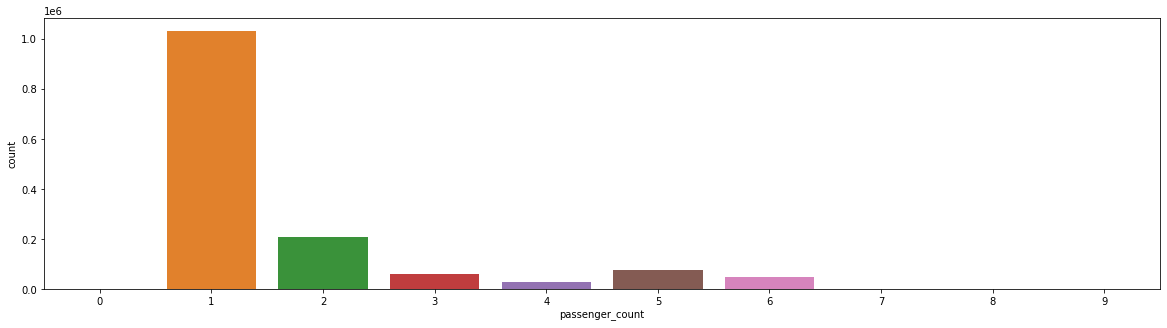

In [ ]:
plt.figure(figsize = (20,5))
sns.countplot(taxi.passenger_count)
plt.show()

There are some trips with 0 passenger count.
Few trips consisted of even 7, 8 or 9 passengers. 
Most of trip consist of passenger either 1 or 2.




In [ ]:
data.passenger_count.describe()

count   1458644.00
mean          1.66
std           1.31
min           0.00
25%           1.00
50%           1.00
75%           2.00
max           9.00
Name: passenger_count, dtype: float64

**Vendor**

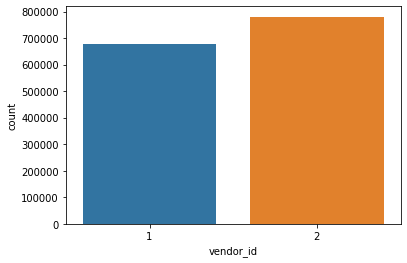

In [ ]:
sns.countplot(data.vendor_id)
plt.show()

**Trip duration**

In [ ]:
taxi.trip_duration.describe()

count   1456540.00
mean        836.86
std         658.93
min           1.00
25%         397.00
50%         662.00
75%        1073.00
max       11411.00
Name: trip_duration, dtype: float64

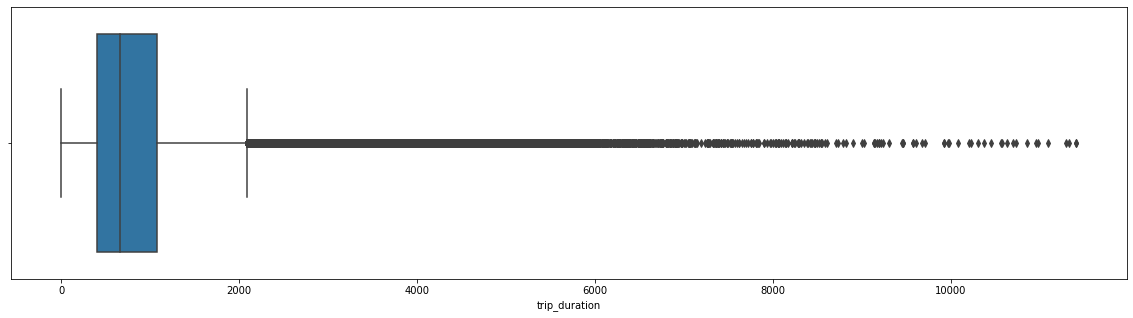

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(taxi.trip_duration)
plt.show()

Some trip durations are over 100000 seconds which are clear outliers and should be removed.


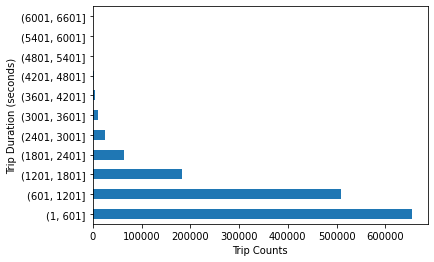

In [ ]:
taxi.trip_duration.groupby(pd.cut(taxi.trip_duration, np.arange(1,7200,600))).count().plot(kind='barh')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()

We can observe that most of the trips took 0 - 30 mins to complete i.e. approx 1800 secs

**Store_and_fwd_flag**

Y=store and forward; N=not a store and forward trip




In [ ]:
taxi.vendor_id[taxi.store_and_fwd_flag == 1].value_counts()

Series([], Name: vendor_id, dtype: int64)

Text(0.5, 1.0, 'Store and Forward Flag')

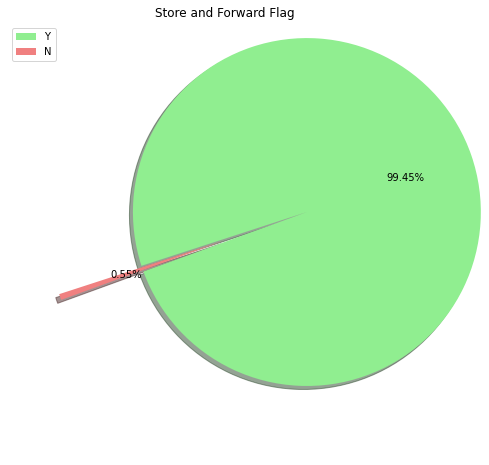

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(taxi['store_and_fwd_flag'].value_counts(), colors=['lightgreen', 'lightcoral'], shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['Y','N'])
plt.title("Store and Forward Flag")

**Total trips Per Hour**

In [ ]:
taxi.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance', 'speed'],
      dtype='object')

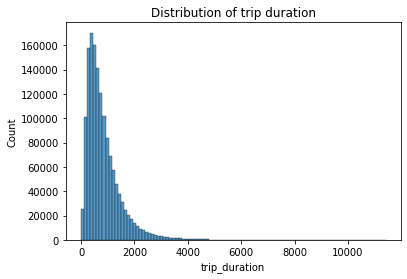

In [ ]:
plt.title("Distribution of trip duration")
sns.histplot(taxi['trip_duration'],bins=100)

#Trip duration per vendor

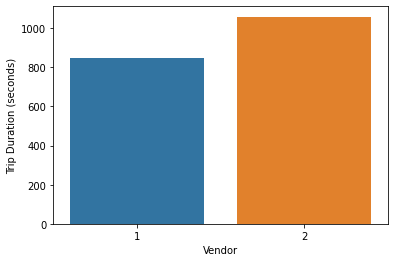

In [ ]:
group4 = data.groupby('vendor_id').trip_duration.mean()
sns.barplot(group4.index, group4.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Vendor')
plt.show()

#Distance v/s Trip duration

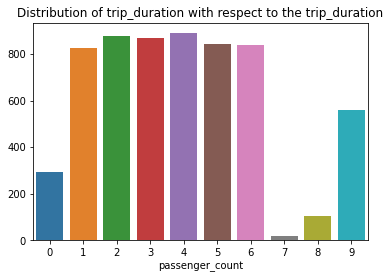

In [ ]:
df = taxi.groupby('passenger_count')['trip_duration'].mean()
plt.title('Distribution of trip_duration with respect to the trip_duration')
sns.barplot(df.index,df.values)

In [ ]:
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=datetime(2016, 3, 1), end=datetime(2016, 4, 1))

taxi['holiday'] = (taxi['pickup_datetime'].dt.date.astype('datetime64[ns]').isin(holidays)).astype(int)

#Traffic Conditions and Pickup & Dropoff Co-ordinates

In [ ]:
# Mean Pickup and Dropoff Latitude
print('Mean Pickup Latitude: ', taxi['pickup_latitude'].mean())
print('Mean Dropoff Latitude: ',taxi['dropoff_latitude'].mean())

Mean Pickup Latitude:  40.750927045289096
Mean Dropoff Latitude:  40.7518012526866


In [ ]:
# Mean Pickup and Dropoff Longitude
print('Mean Pickup Longitude: ', taxi['pickup_longitude'].mean())
print('Mean Dropoff Longitude: ',taxi['dropoff_longitude'].mean())

Mean Pickup Longitude:  -73.97348988334355
Mean Dropoff Longitude:  -73.97341996041985


In [ ]:
# How much does the Pickup and Dropoff Latitude correlate with the Vendor ID?
print('CORR(Vendor ID, Pickup Latitude): ',taxi['vendor_id'].corr(taxi['pickup_latitude']))
print('CORR(Vendor ID, Dropoff Latitude): ',taxi['vendor_id'].corr(taxi['dropoff_latitude']))

CORR(Vendor ID, Pickup Latitude):  0.0018228952993175917
CORR(Vendor ID, Dropoff Latitude):  0.004533275826439585


In [ ]:
# How much does the Pickup and Dropoff Longitude correlate with the Vendor ID?
print('CORR(Vendor ID, Pickup Longitude): ',taxi['vendor_id'].corr(taxi['pickup_longitude']))
print('CORR(Vendor ID, Dropoff Longitude): ',taxi['vendor_id'].corr(taxi['dropoff_longitude']))

CORR(Vendor ID, Pickup Longitude):  0.007751063972570735
CORR(Vendor ID, Dropoff Longitude):  0.001495787920510666


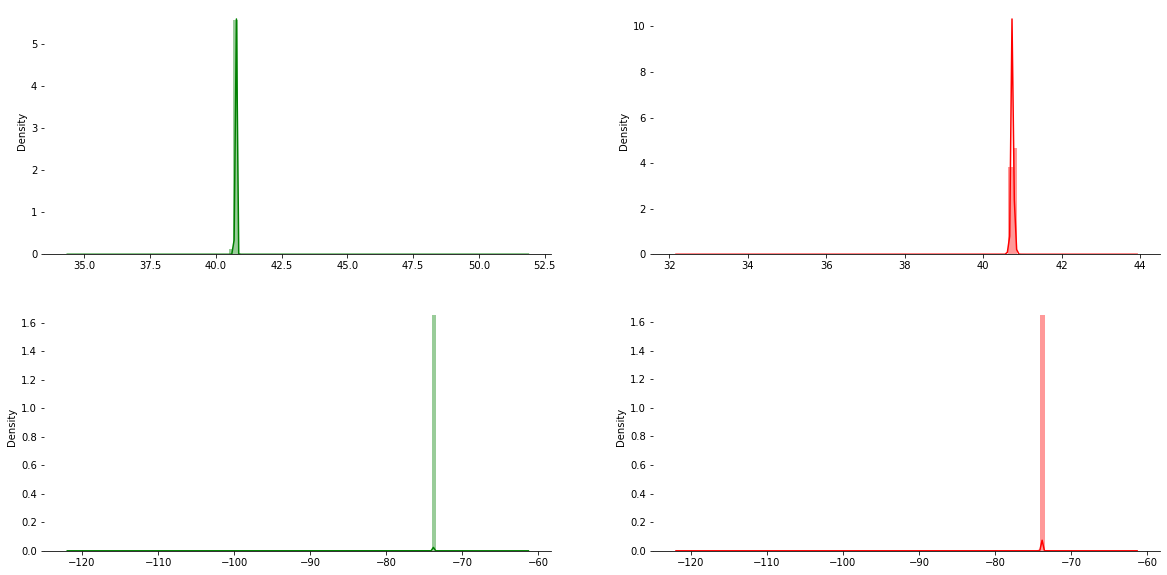

In [ ]:
# Plot a univariate distribution of observations for latitude and longitude values to get a sense of where the most of the rides
# are concentrated in terms of location.
fig, ax = plt.subplots(2,2,figsize=(20, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(taxi['pickup_latitude'].values, label = 'pickup_latitude',color="g",bins = 100, ax=ax[0,0])
sns.distplot(taxi['dropoff_latitude'].values, label = 'dropoff_latitude',color="r",bins = 100, ax=ax[0,1])
sns.distplot(taxi['pickup_longitude'].values, label = 'pickup_longitude',color="g",bins = 100, ax=ax[1,0])
sns.distplot(taxi['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins = 100, ax=ax[1,1])

Latitude: 40 to 41

Longitude: -73 to -74

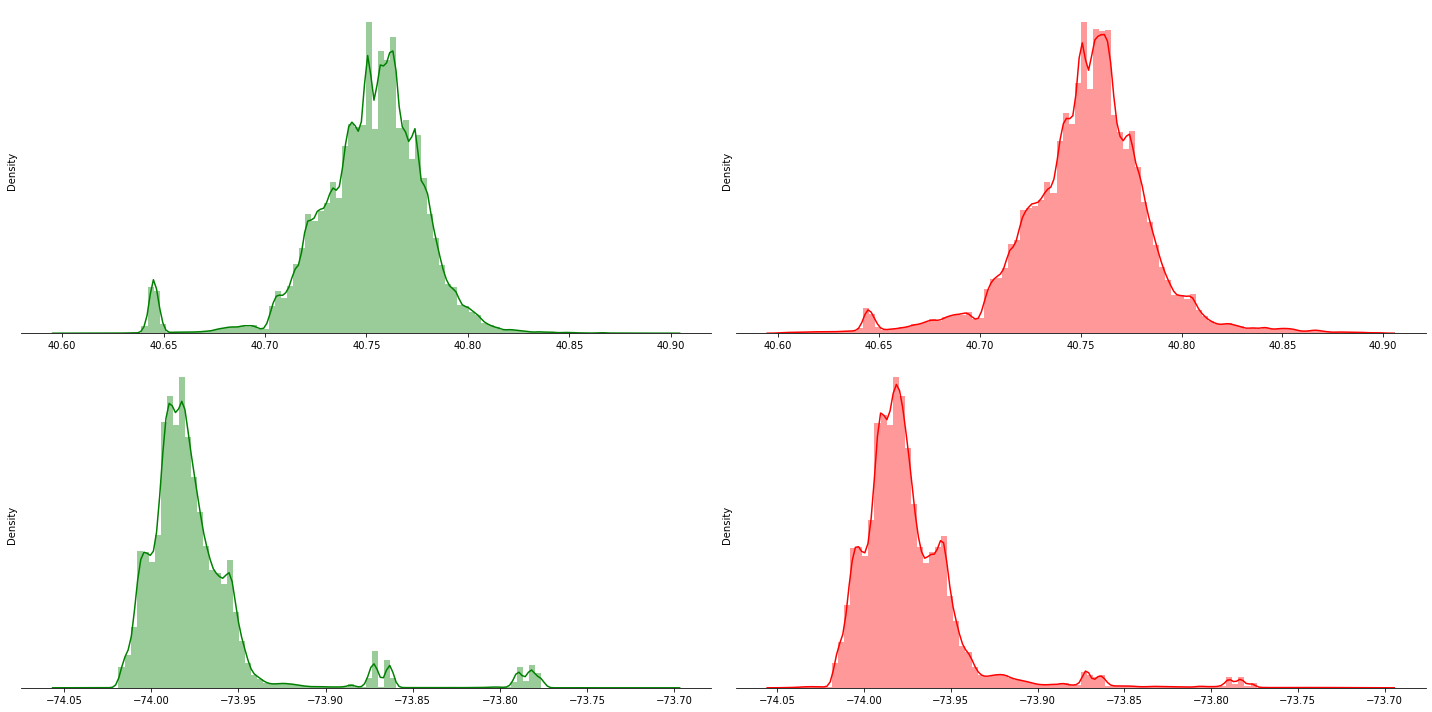

In [ ]:
# Add bounds to coordinates from the taxiset to avoid Outliers affecting the plots
coord = taxi.loc[(taxi.pickup_latitude > 40.6) & (taxi.pickup_latitude < 40.9)]
coord = coord.loc[(taxi.dropoff_latitude > 40.6) & (taxi.dropoff_latitude < 40.9)]
coord = coord.loc[(taxi.pickup_longitude > -74.05) & (taxi.pickup_longitude < -73.7)]
coord = coord.loc[(taxi.dropoff_longitude > -74.05) & (taxi.dropoff_longitude < -73.7)]

# Plot the distribution plot again with the same values but this time with the bounds in place for coordinates
fig, ax = plt.subplots(2,2,figsize=(20, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(coord['pickup_latitude'].values, label = 'pickup_latitude',color="g",bins = 100, ax=ax[0,0])
sns.distplot(coord['dropoff_latitude'].values, label = 'dropoff_latitude',color="r",bins = 100, ax=ax[0,1])
sns.distplot(coord['pickup_longitude'].values, label = 'pickup_longitude',color="g",bins = 100, ax=ax[1,0])
sns.distplot(coord['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins = 100, ax=ax[1,1])
plt.setp(ax, yticks=[])
plt.tight_layout()

 most of the trips are concentrated within these bounds of the coordinates



In [ ]:
#First chech the index of the features and label
list(zip( range(0,len(data.columns)),taxi.columns))

[(0, 'id'),
 (1, 'vendor_id'),
 (2, 'pickup_datetime'),
 (3, 'dropoff_datetime'),
 (4, 'passenger_count'),
 (5, 'pickup_longitude'),
 (6, 'pickup_latitude'),
 (7, 'dropoff_longitude'),
 (8, 'dropoff_latitude'),
 (9, 'store_and_fwd_flag'),
 (10, 'trip_duration'),
 (11, 'distance'),
 (12, 'speed'),
 (13, 'holiday')]

#Heatmap

Text(0.5, 1.0, 'Correlation Plot')

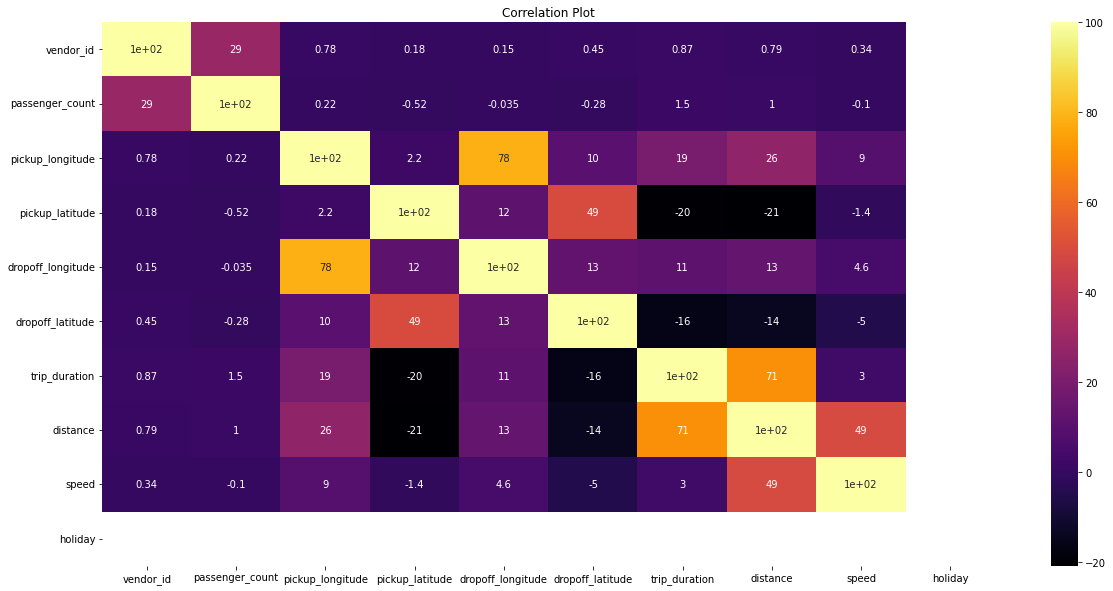

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(taxi.corr()*100, annot=True, cmap='inferno')
plt.title('Correlation Plot')

#Feature engineering

In [ ]:
taxi['pickup_datetime'] = pd.to_datetime(taxi.pickup_datetime)
taxi.loc[:, 'pickup_date'] = taxi['pickup_datetime'].dt.date
taxi.loc[:, 'pickup_time'] = taxi['pickup_datetime'].dt.time
taxi['dropoff_datetime'] = pd.to_datetime(taxi.dropoff_datetime)
taxi.loc[:, 'dropoff_date'] = taxi['dropoff_datetime'].dt.date
taxi.loc[:, 'dropoff_time'] = taxi['dropoff_datetime'].dt.time
taxi.loc[:, 'dropoff_hour'] = taxi['dropoff_datetime'].dt.hour
taxi.loc[:, 'dropoff_weekday'] = taxi['dropoff_datetime'].dt.weekday
taxi.loc[:, 'dropoff_month'] = taxi['dropoff_datetime'].dt.month
taxi.loc[:, 'pickup_weekday'] = taxi['pickup_datetime'].dt.weekday
taxi.loc[:, 'pickup_weekofyear'] = taxi['pickup_datetime'].dt.weekofyear
taxi.loc[:, 'pickup_hour'] = taxi['pickup_datetime'].dt.hour
taxi.loc[:, 'pickup_minute'] = taxi['pickup_datetime'].dt.minute
taxi.loc[:, 'pickup_dt'] = (taxi['pickup_datetime'] - taxi['pickup_datetime'].min()).dt.total_seconds()
taxi.loc[:, 'pickup_week_hour'] = taxi['pickup_weekday'] * 24 + taxi['pickup_hour']
taxi.loc[:, 'pickup_dayofyear'] = taxi['pickup_datetime'].dt.dayofyear
taxi.loc[:, 'pickup_month'] = taxi['pickup_datetime'].dt.month

Text(0.5, 1.0, 'Overall Monthly trips')

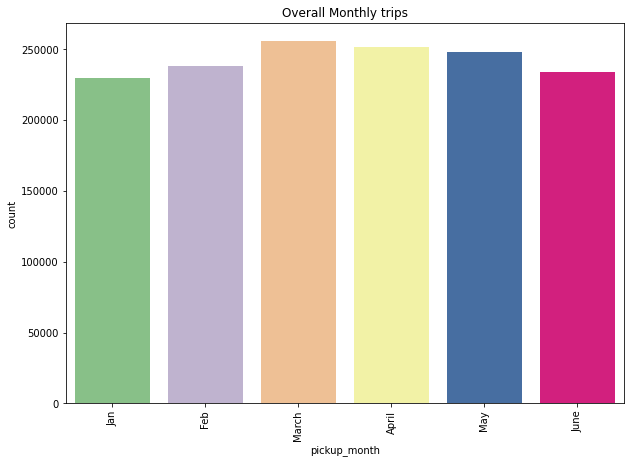

In [ ]:
#monthly trips exploration

plt.figure(figsize=(10,7))
sns.countplot(taxi['pickup_month'], palette='Accent')
plt.xticks([0,1,2,3,4,5], labels=['Jan','Feb','March','April','May','June'], rotation=90)
plt.title('Overall Monthly trips')

Number of trips in a particular month - March and April marking the highest.

January being lowest probably due to extreme SnowFall NYC.

Text(0.5, 1.0, 'Overall Week day Trips')

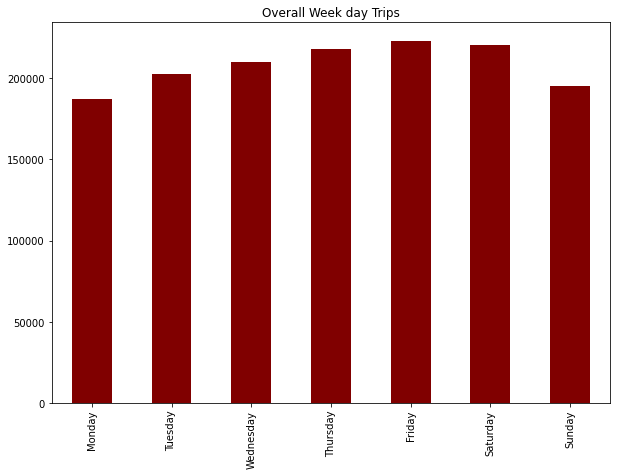

In [ ]:
#Analyzing week day trips

plt.figure(figsize=(10,7))
pickup_week = taxi['pickup_weekday'].value_counts()
pickup_week.sort_index().plot(kind='bar', color='maroon')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=90)
plt.title('Overall Week day Trips')

Text(0.5, 1.0, 'Hourly Pickups')

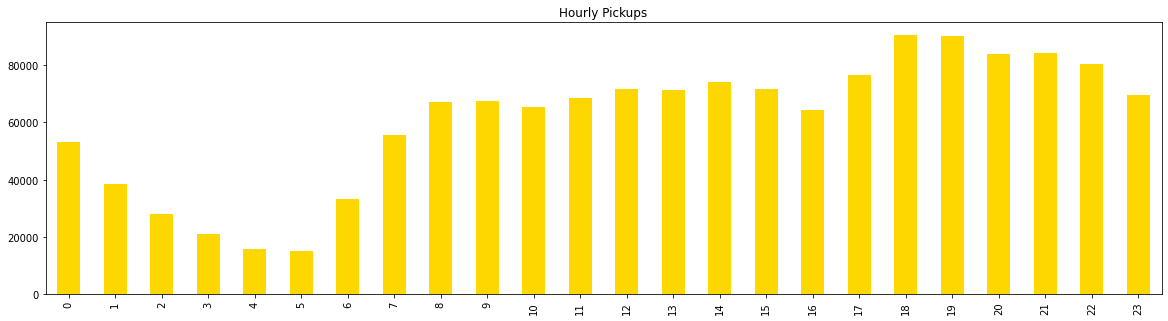

In [ ]:
#Analyzing hourly pickups

plt.figure(figsize=(20,5))
pickup_hour = taxi['pickup_hour'].value_counts()
pickup_hour.sort_index().plot(kind='bar', color='gold')
plt.title("Hourly Pickups")

 Rush hours (5 pm to 10 pm), probably office leaving time.

Text(0.5, 1.0, 'Time Vs No. of Rides')

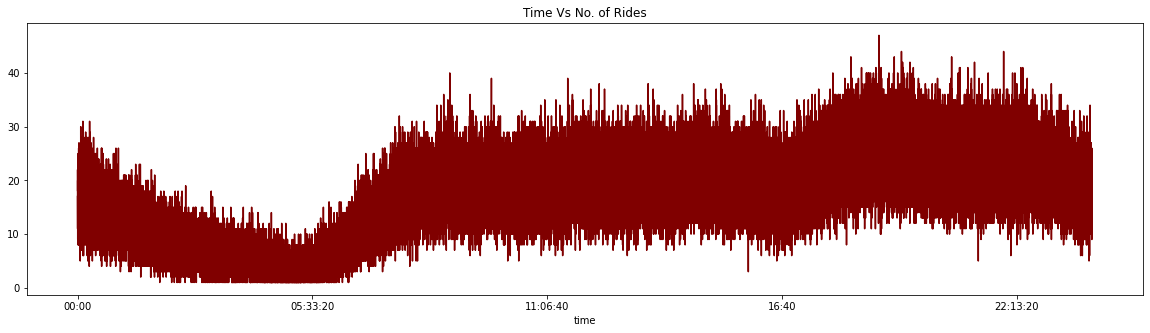

In [ ]:
plt.figure(figsize=(20,5))
pickup_time = taxi['pickup_time'].value_counts()
pickup_time.sort_index().plot(kind='line', color='maroon')
plt.title('Time Vs No. of Rides')

Text(0.5, 1.0, 'Overall Monthly trips')

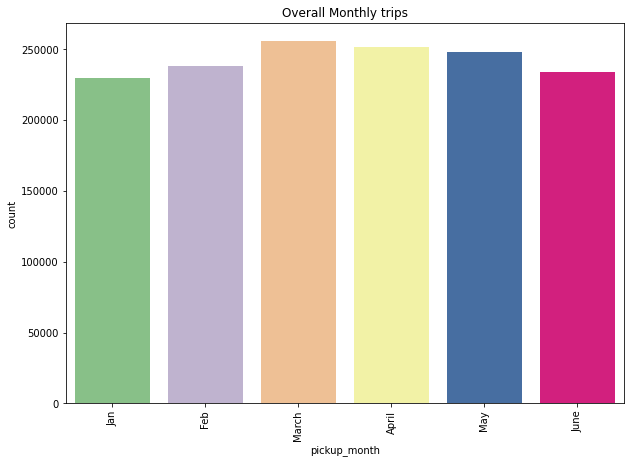

In [ ]:
#monthly trips exploration

plt.figure(figsize=(10,7))
sns.countplot(taxi['pickup_month'], palette='Accent')
plt.xticks([0,1,2,3,4,5], labels=['Jan','Feb','March','April','May','June'], rotation=90)
plt.title('Overall Monthly trips')

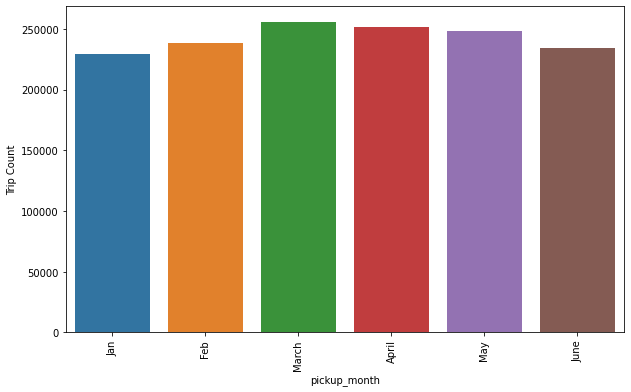

In [ ]:
# Analyzing the trips per month
plt.figure(figsize = (10,6))
sns.countplot(taxi.pickup_month)
plt.ylabel('Trip Count')
plt.xticks([0,1,2,3,4,5], labels=['Jan','Feb','March','April','May','June'], rotation=90)

plt.show()

# Distance and Hour

In [ ]:
# plotting for distance to hour
plt.figure(figsize = (10,6))
sns.lineplot(y='distance',x='Hour_of_Pickup',taxi=taxi)
plt.ylabel('Distance')
plt.xlabel('Pickup Hour')
plt.show()

ValueError: ignored

<Figure size 720x432 with 0 Axes>

# Distance and Trip Duration

In [ ]:
# We should remove those trips which covered 0 km distance.
taxi = taxi[~(taxi.distance == 0)]

# Plotting graph for trip duration and Distance
plt.figure(figsize = (10,6))
sns.regplot(taxi.distance, taxi.trip_duration)
plt.ylabel('Trip Duration')
plt.xlabel('Distance')
plt.show()
